<a href="https://colab.research.google.com/github/StefanDjuran/PPPOProjekatFaceRecognition/blob/main/PPPOStefanDjuranIT35_2020FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detekcija lica**


U ovom projektu prikazano je resenje za problem detekcije i prepoznavanja lica na slikama. Detekcija je uradjena uz pomoc HOG algoritma, dok se za prepoznavanje koristi biblioteka face_recognition.

Dataset koji je koriscen sadrzi slike glumaca iz filma Avengers: Chris Evans, Chris Hemsworth, Mark Ruffalo, Robert Downey Jr i Scarlett Johansson

Na početku je prvo preuzet i raspakovan skup podataka.

In [1]:
!pip install gdown

In [2]:
!gdown --fuzzy https://drive.google.com/file/d/1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6/view

Downloading...
From (original): https://drive.google.com/uc?id=1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6
From (redirected): https://drive.google.com/uc?id=1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6&confirm=t&uuid=5db29220-3fc9-4187-a6ac-3bfc0625a868
To: /content/AVENGERS_FaceDetection.zip
100% 57.2M/57.2M [00:02<00:00, 19.2MB/s]


In [3]:
!unzip AVENGERS_FaceDetection.zip

Archive:  AVENGERS_FaceDetection.zip
  inflating: cropped_images/chris_evans/chris_evans1.png  
  inflating: cropped_images/chris_evans/chris_evans10.png  
  inflating: cropped_images/chris_evans/chris_evans11.png  
  inflating: cropped_images/chris_evans/chris_evans12.png  
  inflating: cropped_images/chris_evans/chris_evans13.png  
  inflating: cropped_images/chris_evans/chris_evans14.png  
  inflating: cropped_images/chris_evans/chris_evans15.png  
  inflating: cropped_images/chris_evans/chris_evans16.png  
  inflating: cropped_images/chris_evans/chris_evans17.png  
  inflating: cropped_images/chris_evans/chris_evans18.png  
  inflating: cropped_images/chris_evans/chris_evans19.png  
  inflating: cropped_images/chris_evans/chris_evans2.png  
  inflating: cropped_images/chris_evans/chris_evans20.png  
  inflating: cropped_images/chris_evans/chris_evans21.png  
  inflating: cropped_images/chris_evans/chris_evans22.png  
  inflating: cropped_images/chris_evans/chris_evans23.png  
  inf

# **HOG - Histogram orijentisanih gradijenata**

Jedna od tehnika detekcije objekata na slici koristi gradijente. Ova tehnika uključuje deljenje slike na različite blokove, nakon čega se u svakom bloku računa gradijent koji pokazuje u kojem pravcu se pikseli menjaju najviše. Korišćenje gradijenata olakšava pronalaženje potencijalnih objekata na slici.

Ova metoda se često kombinuje sa drugim tehnikama kako bi se postigli optimalni rezultati i prevazišla određena ograničenja, kao što su promene položaja ili izraza lica.

1


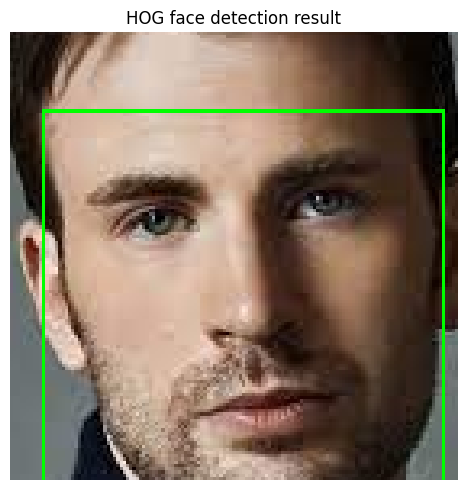

In [4]:

import cv2
import dlib
import matplotlib.pylab as plt

image = cv2.cvtColor(cv2.imread('cropped_images/chris_evans/chris_evans1.png'), cv2.COLOR_BGR2RGB)

hog = dlib.get_frontal_face_detector()

faces = hog(image, 0)

print(len(faces))

for f in faces:
    left = f.left()
    top = f.top()
    right = f.right()
    bottom = f.bottom()

image = cv2.rectangle(image,(left,top),(right,bottom),(0,255,0),1)

plt.figure(figsize=(10,5))
plt.imshow(image), plt.axis('off')
plt.title("HOG face detection result")
plt.tight_layout()
plt.show()

# **OpenCV**

OpenCV, poznata kao Open Source Computer Vision Library, je biblioteka namenjena računarskoj viziji i mašinskom učenju. Razvijena je kako bi pružila osnovnu infrastrukturu za aplikacije računarske vizije i olakšala integraciju mašinskog učenja u komercijalne proizvode. Sa Apache 2 licencom, OpenCV omogućava kompanijama jednostavnu upotrebu i modifikaciju koda.

Ova biblioteka obuhvata preko 2500 optimizovanih algoritama, uključujući širok spektar klasičnih i najmodernijih rešenja za računarsku viziju i mašinsko učenje. Ovi algoritmi se koriste za različite svrhe, uključujući detekciju i prepoznavanje lica, identifikaciju objekata, klasifikaciju ljudskih akcija u video zapisima, praćenje kretanja kamere, praćenje pokretnih objekata, izdvajanje 3D modela objekata, pronalaženje sličnih slika u bazi podataka slika, uklanjanje crvenih očiju sa slika snimljenih bljeskom, praćenje pokreta očiju i postavljanje markera za proširenu stvarnost, itd.

OpenCV ima veliku korisničku zajednicu sa preko 47 hiljada članova, a broj preuzimanja prelazi 18 miliona. Zbog svoje široke primene, ova biblioteka se koristi u različitim industrijama, istraživačkim grupama i od strane vladinih tela.

# **Prepoznavanje lica**

Prepoznavanje lica predstavlja napredniji korak u odnosu na detekciju lica, jer ne samo da identifikuje prisustvo lica na slici, već takođe pokušava da utvrdi da li je to lice poznato ili ne. Ova tehnologija se široko koristi, posebno u svakodnevnim aktivnostima kao što je otključavanje mobilnih uređaja.

Rad prepoznavanja lica se zasniva na analizi skupa karakteristika lica kako bi se uporedio sa podacima iz baze. Ukoliko postoji podudaranje sa nekom osobom iz baze podataka, sistem može prepoznati tu osobu. U suprotnom, ako se lice ne podudara sa nijednim zapisom u bazi, moguće je dodati novo lice u sistem.

In [5]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=7417fb775a6b618874442d07bba1f8b63aab057359a35d626e102a45e8d5a40d
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [6]:

import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

evans_image = face_recognition.load_image_file('cropped_images/chris_evans/chris_evans14.png')
evans_face_encoding = face_recognition.face_encodings(evans_image) [0]

hemsworth_image = face_recognition.load_image_file('cropped_images/chris_hemsworth/chris_hemsworth13.png')
hemsworth_face_encoding = face_recognition.face_encodings(hemsworth_image) [0]

ruffalo_image = face_recognition.load_image_file('cropped_images/mark_ruffalo/mark_ruffalo27.png')
ruffalo_face_encoding = face_recognition.face_encodings(ruffalo_image) [0]

downey_image = face_recognition.load_image_file('cropped_images/robert_downey_jr/robert_downey_jr44.png')
downey_face_encoding = face_recognition.face_encodings(downey_image) [0]

johansson_image = face_recognition.load_image_file('cropped_images/scarlett_johansson/scarlett_johansson37.png')
johansson_image_encoding = face_recognition.face_encodings(johansson_image) [0]

face_encodings_known = [
    evans_face_encoding,
    hemsworth_face_encoding,
    ruffalo_face_encoding,
    downey_face_encoding,
    johansson_image_encoding
]
people_names = [
    "Chris Evans",
    "Chris Hemsworth",
    "Mark Ruffalo",
    "Robert Downey",
    "Scarlett Johansson"
]

print('Learned encoding for', len(face_encodings_known), 'images.')

Learned encoding for 5 images.


In [7]:
!mkdir test
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/1453F/production/_101236238_avengers2.jpg -O test/avengers.jpg

--2024-04-08 15:07:02--  https://ichef.bbci.co.uk/news/976/cpsprodpb/1453F/production/_101236238_avengers2.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.38.30.132, 2a02:26f0:1180:594::f33, 2a02:26f0:1180:595::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.38.30.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123623 (121K) [image/jpeg]
Saving to: ‘test/avengers.jpg’

test/avengers.jpg   100%[===================>] 120.73K  --.-KB/s    in 0.01s   

2024-04-08 15:07:02 (8.88 MB/s) - ‘test/avengers.jpg’ saved [123623/123623]



<ipython-input-8-929096ae41ca>:25: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-8-929096ae41ca>:25: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-8-929096ae41ca>:25: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-8-929096ae41ca>:25: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-8-929096ae41ca>:25: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  t

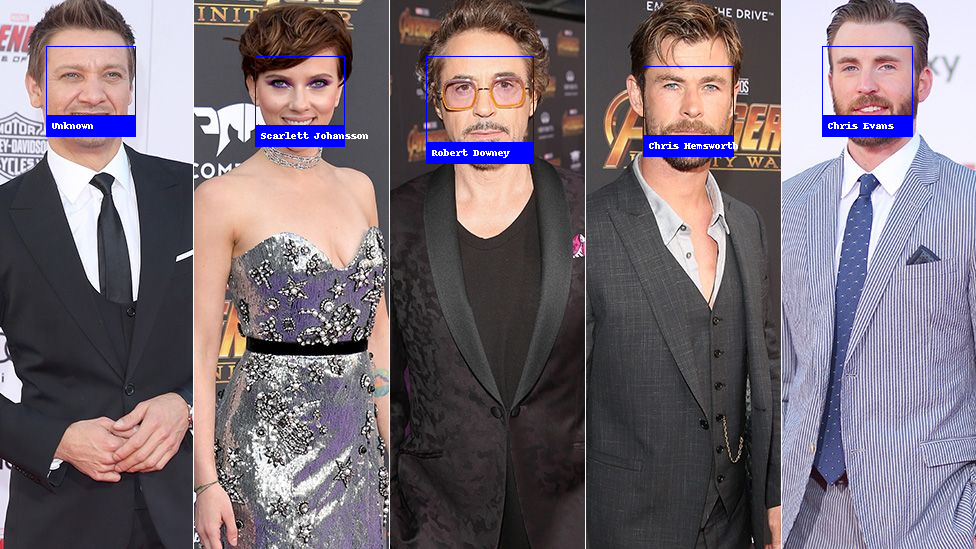

In [8]:

test_image = face_recognition.load_image_file('test/avengers.jpg')

face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)

pil_image = Image.fromarray(test_image)

draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

    matches = face_recognition.compare_faces(face_encodings_known, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(face_encodings_known, face_encoding)

    best_match_index = np.argmin(face_distances)

    if matches[best_match_index]:
        name = people_names[best_match_index]

    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


del draw

display(pil_image)

# **HaarCascade**

Haar Cascades je algoritam za detekciju objekata koji igra ključnu ulogu u oblasti računarske vizije, posebno u prepoznavanju lica. Razvijen od strane Paula Viola i Michaela Jonesa 2001. godine, ovaj algoritam koristi specifične osobine poznate kao "Haar osobine" kako bi analizirao slike i identifikovao obrasce koji odgovaraju ciljanim objektima, kao što su lica.

Ono što Haar Cascades čini jedinstvenim je njegova kaskadna struktura klasifikatora. Umesto da analizira svaki piksel na slici, algoritam koristi niz klasifikatora organizovanih u kaskadu. Svaki klasifikator postaje sve precizniji u prepoznavanju potencijalnih objekata. Ako određeni deo slike ne premaši prag odlučivanja određenog klasifikatora, taj deo se brzo odbacuje kao da ne sadrži objekat, što omogućava brzu i efikasnu detekciju.

Haar Cascades se široko primenjuje u različitim oblastima, uključujući prepoznavanje lica u kamerama pametnih telefona, sigurnosnim sistemima, detekciji registarskih tablica i mnogim drugim aspektima računarske vizije. Njegova sposobnost za rad u stvarnom vremenu i efikasnost u korišćenju resursa čini ga ključnim alatom u modernoj računarskoj viziji.

Ovaj kod koristi OpenCV biblioteku za detekciju lica, očiju i osmeha na digitalnoj slici. Počinje uvozom potrebnih biblioteka, uključujući OpenCV, i učitavanjem prethodno obučenih klasifikatora za ove karakteristike. Zatim se odabrana slika konvertuje u crno-belu boju radi bolje obrade.

Nakon toga, primenjuje se detekcija lica na slici pomoću funkcije **face_cascade.detectMultiScale**, koja označava pronađena lica crvenim pravougaonicima. Za svako prepoznato lice, algoritam koristi funkciju **eye_cascade.detectMultiScale** za pronalaženje očiju i **smile_cascade**.**detectMultiScale** za pronalaženje osmeha, a zatim označava oči zelenim, a osmeh plavim pravougaonicima. Na kraju, rezultat se prikazuje korisniku sa vizuelnim indikacijama prepoznatih lica, očiju i osmeha na slici.

Haar Cascade ne može da funkcioniše sa kompleksnijim objektima, neke od limitacija su: Niža preciznost u odnosu na moderne detektore objekata, veci broj grešaka i potreba za ručnim podešavanjem parametara

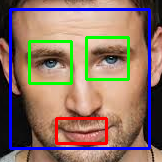

-1

In [9]:
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml'))
smile_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_smile.xml'))

img = cv2.imread('cropped_images/chris_evans/chris_evans39.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 1)

for (x, y, z, u) in faces:
    cv2.rectangle(img, (x, y), (x+z, y+u), (255, 0, 0), 2)
    roi_gray = gray[y:y+u, x:x+z]
    roi_color = img[y:y+u, x:x+z]

    eyes = eye_cascade.detectMultiScale(roi_gray, 1.04, 10)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    smile = smile_cascade.detectMultiScale(roi_gray, 1.38, 6)
    for (mx,my,mw,mh) in smile:
        cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)

cv2_imshow(img)
cv2.waitKey()

# **MTCNN**

MTCNN (MultiTask Cascaded Convolutional Neural Network) predstavlja napredno sredstvo za detekciju lica koje koristi neuronsku mrežu u tri faze. Prvi korak uključuje analizu slika različitih dimenzija kako bi se identifikovala lica različitih veličina. Zatim, P-mreža (Proposal) vrši preliminarnu detekciju lica sa niskim pragom, što može rezultirati većim brojem lažno pozitivnih detekcija, ali je to deo procesa. Predloženi regioni, uključujući i lažno pozitivne detekcije, postaju ulaz za drugu mrežu, R-mrežu (Refine), koja koristi tehniku nemaksimalne supresije (NMS) kako bi filtrirala detekcije i postigla preciznije granice lica. U završnoj fazi, O-mreža (Output) vrši konačnu optimizaciju granica lica. Ovo omogućava ne samo detekciju lica već i preciznije i ispravnije granice lica. Dodatna funkcionalnost MTCNN-a je detekcija karakterističnih tačaka na licu, kao što su oči, nos i uglovi usta.

In [10]:

!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.9 MB/s eta 0:00:00



U ovom kodu prvo su uvezene neophodne biblioteke, uključujući MTCNN (MultiTask Cascaded Convolutional Neural Network) detektor, OpenCV (cv2) za rad sa slikama, i cv2_imshow za prikazivanje rezultata u Colab okruženju. Nakon toga, učitava se slika koja će biti obrađena. Zatim se inicijalizuje MTCNN detektor i koristi za otkrivanje lica na slici. Rezultat detekcije su koordinate okvira lica, koordinate levog oka, desnog oka, nosa, leve ivice usta i desne ivice usta za svako otkriveno lice na slici. Sve te informacije su prikazane kao rezultat za dalju obradu ili prikazivanje.

In [11]:
from mtcnn.mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('cropped_images/chris_evans/chris_evans1.png')

detector = MTCNN()
faces = detector.detect_faces(image)

for face in faces:
  print(face)

1/1 [==============================] - 0s 264ms/step
{'box': [12, 0, 116, 147], 'confidence': 0.9990837574005127, 'keypoints': {'left_eye': (45, 57), 'right_eye': (100, 54), 'nose': (72, 87), 'mouth_left': (56, 116), 'mouth_right': (98, 113)}}


U narednom kodu definišemo funkciju **create_box** koja ima zadatak da na ulaznoj slici detektuje lice, označi ga pravougaonikom i istakne ključne tačke na licu, uključujući levo i desno oko, nos, levu i desnu ivicu usta. Prvo se koristi MTCNN detektor za detekciju lica na slici, a zatim se dobijaju koordinate okvira lica i ključnih tačaka. Nakon toga, funkcija crta pravougaonik oko lica na slici koristeći ove koordinate i ističe ključne tačke na licu crtanjem tačaka na odgovarajućim mestima. Na kraju, funkcija vraća sliku sa označenim licem i ključnim tačkama. Rezultirajuća slika se prikazuje pomoću **cv2_imshow**.

1/1 [==============================] - 0s 27ms/step


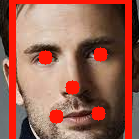

In [12]:

def create_box(image):

  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']
  keypoints = faces[0]['keypoints']

  cv2.rectangle(image,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                (5, 22, 255),
                5)

  cv2.circle(image,(keypoints['left_eye']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['right_eye']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['nose']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['mouth_left']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['mouth_right']), 2, (5, 22, 255), 10)

  return image

marked_image = create_box(image)
cv2_imshow(marked_image)


# **Zaključak projekta**

Ovaj rad istražuje primenu tehnika mašinskog učenja i dubokog učenja u detekciji lica na digitalnim slikama. Detekcija lica je ključna tehnologija u oblasti veštačke inteligencije sa mnogim praktičnim primenama, uključujući bezbednost, biometriju, sprovođenje zakona i zabavu.

Razmotrena je detekcija lica pomoću HOG karakteristika i SVM algoritma. HOG karakteristike su se pokazale kao moćan deskriptor za prepoznavanje oblika objekata, uključujući lica. Međutim, ovaj pristup ima svoja ograničenja, posebno u vezi sa detekcijom lica koja nisu frontalna i ravna.

Istražene su različite tehnike detekcije lica, uključujući HaarCascade i MTCNN biblioteke. HaarCascade koristi predefinisane klasifikatore za detekciju lica, očiju i osmeha i može se koristiti za brzu detekciju u realnom vremenu. MTCNN je moderna mreža za detekciju lica koja pruža visoku preciznost i robustnost u različitim uslovima.

Svaka od ovih tehnika ima svoje prednosti i mane, i izbor detektora zavisiće od specifičnih zahteva aplikacije. Duboko učenje i mašinsko učenje omogućavaju kontinuirani napredak u oblasti detekcije lica i obećavaju nove i naprednije metode u budućnosti.

Ovaj rad istražio je različite tehnike i alate za detekciju lica, istražujući njihove prednosti i ograničenja. Važno je napomenuti da se detekcija lica i dalje razvija, a buduće tehnologije mogu doneti još bolje rezultate i veću preciznost.